<a href="https://colab.research.google.com/github/athens-igg/dfu-models/blob/main/simpleCNN_alone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install kaggle


In [2]:
from google.colab import files
files.upload()   # select kaggle.json


Saving kaggle (21).json to kaggle (21).json


{'kaggle (21).json': b'{"username":"athenkaggle","key":"ed45b14f709d7c30e2d7547bf6721532"}'}

In [3]:

!mkdir -p ~/.kaggle
!cp "kaggle (21).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [4]:

!kaggle datasets download -d purushomohan/dfu-wagners-classification

Dataset URL: https://www.kaggle.com/datasets/purushomohan/dfu-wagners-classification
License(s): unknown
  0% 0.00/44.6M [00:00<?, ?B/s]
100% 44.6M/44.6M [00:00<00:00, 1.42GB/s]


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [6]:
!unzip -q dfu-wagners-classification.zip -d /content/drive

In [7]:
train_data="/content/drive/Dataset/Training"
valid_data="/content/drive/Dataset/Validation"

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25
N_CLASSES = 5   # Wagner 0–4

# ============================
# 1) Data Preprocessing & Augmentation
# ============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_data,  # path to training dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    valid_data,  # path to validation dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ============================
# 2) Define Simple CNN Model
# ============================
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(N_CLASSES, activation="softmax")
])

# ============================
# 3) Compile
# ============================
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ============================
# 4) Callbacks
# ============================
checkpoint = ModelCheckpoint(
    "/content/drive/Dataset/best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min"
)

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, verbose=1),
    checkpoint
]

# ============================
# 5) Train
# ============================
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=callbacks
)


Found 965 images belonging to 5 classes.
Found 116 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4969 - loss: 1.8259

31/31 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.4983 - loss: 1.8146 - val_accuracy: 0.5603 - val_loss: 1.1570 - learning_rate: 0.0010
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.6583 - loss: 0.9962 - val_accuracy: 0.5259 - val_loss: 1.2519 - learning_rate: 0.0010
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7429 - loss: 0.8464

31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7434 - loss: 0.8450 - val_accuracy: 0.6466 - val_loss: 0.9677 - learning_rate: 0.0010
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7872 - loss: 0.6963 - val_accuracy: 0.6034 - val_loss: 1.1414 - learning_rate: 0.0010
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7348 - loss: 0.9412 - val_accuracy: 0.6638 - val_loss: 1.0039 - learning_rate: 0.0010
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7696 - loss: 0.7251

31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7701 - loss: 0.7242 - val_accuracy: 0.6552 - val_loss: 0.9539 - learning_rate: 0.0010
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8177 - loss: 0.6208

31/31 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.8176 - loss: 0.6204 - val_accuracy: 0.6724 - val_loss: 0.8819 - learning_rate: 0.0010
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7916 - loss: 0.6477

31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7912 - loss: 0.6489 - val_accuracy: 0.7069 - val_loss: 0.7923 - learning_rate: 0.0010
Epoch 9/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.7921 - loss: 0.6222 - val_accuracy: 0.6207 - val_loss: 1.0159 - learning_rate: 0.0010
Epoch 10/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7853 - loss: 0.7335

31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7852 - loss: 0.7331 - val_accuracy: 0.7155 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 11/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.8419 - loss: 0.5348 - val_accuracy: 0.6724 - val_loss: 0.7903 - learning_rate: 0.0010
Epoch 12/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.8312 - loss: 0.5301 - val_accuracy: 0.6466 - val_loss: 0.8029 - learning_rate: 0.0010
Epoch 13/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8191 - loss: 0.5566

31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8193 - loss: 0.5562 - val_accuracy: 0.6897 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 14/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8416 - loss: 0.4855 - val_accuracy: 0.6810 - val_loss: 0.9240 - learning_rate: 0.0010
Epoch 15/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8414 - loss: 0.4778 - val_accuracy: 0.6897 - val_loss: 0.7812 - learning_rate: 0.0010
Epoch 16/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8372 - loss: 0.5278 - val_accuracy: 0.6897 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 17/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.8450 - loss: 0.4525 - val_accuracy: 0.6897 - val_loss: 0.9172 - learning_rate: 0.0010
Epoch 18/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8275 - loss: 0.4602
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
31/31 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.8276 - loss: 0.4605 - val_accuracy: 

31/31 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8527 - loss: 0.4272 - val_accuracy: 0.7500 - val_loss: 0.6640 - learning_rate: 2.0000e-04
Epoch 20/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8504 - loss: 0.3939

31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.8506 - loss: 0.3940 - val_accuracy: 0.7672 - val_loss: 0.6475 - learning_rate: 2.0000e-04
Epoch 21/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8617 - loss: 0.3621 - val_accuracy: 0.7500 - val_loss: 0.6512 - learning_rate: 2.0000e-04
Epoch 22/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.8450 - loss: 0.3931 - val_accuracy: 0.7414 - val_loss: 0.7124 - learning_rate: 2.0000e-04
Epoch 23/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8826 - loss: 0.3658

31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8823 - loss: 0.3665 - val_accuracy: 0.7931 - val_loss: 0.6400 - learning_rate: 2.0000e-04
Epoch 24/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8689 - loss: 0.4059 - val_accuracy: 0.6897 - val_loss: 0.8059 - learning_rate: 2.0000e-04
Epoch 25/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8623 - loss: 0.3545 - val_accuracy: 0.7586 - val_loss: 0.6561 - learning_rate: 2.0000e-04


In [9]:
from tensorflow.keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model("/content/drive/Dataset/best_model.h5")

# Evaluate on validation data
val_loss, val_acc = best_model.evaluate(val_gen)
print(f"Best Validation Accuracy: {val_acc*100:.2f}%")
print(f"Best Validation Loss: {val_loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7818 - loss: 0.6736
Best Validation Accuracy: 79.31%
Best Validation Loss: 0.6400


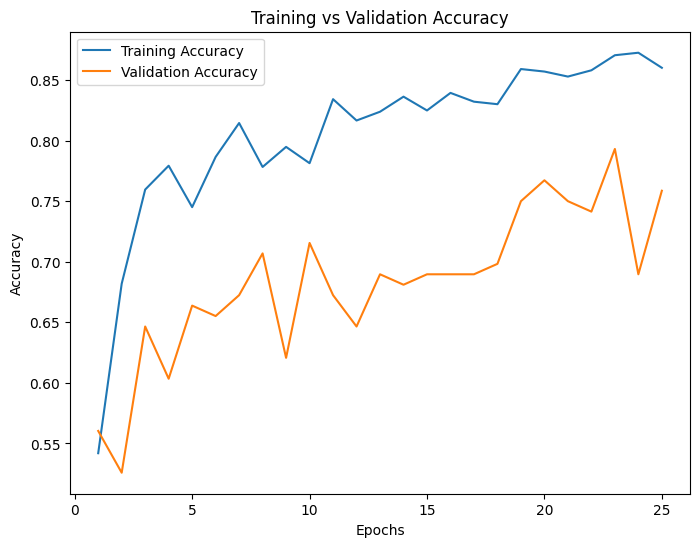

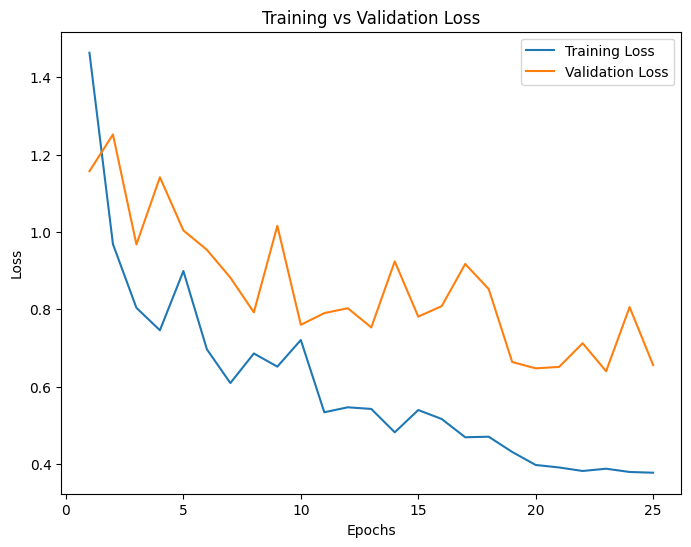

In [10]:
import matplotlib.pyplot as plt

# Use only the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8,6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [11]:
model.save('/content/drive/Dataset/best_model.h5')


Saving Screenshot 2025-09-21 233831.png to Screenshot 2025-09-21 233831.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


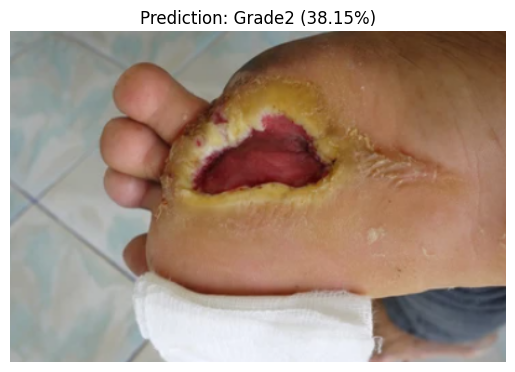

In [12]:
!pip install opencv-python-headless
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Upload image
uploaded = files.upload()
class_names = ["Grade 0", "Grade1", "Grade2", "Grade3", "Normal" ]
filename = list(uploaded.keys())[0]

# Load and preprocess image
IMG_SIZE = (224, 224)
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, IMG_SIZE)

# Normalize same as training (rescale 1/255)
img_array = img_resized.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict
pred = best_model.predict(img_array)
class_id = np.argmax(pred)
confidence = np.max(pred)

# Show result
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Prediction: {class_names[class_id]} ({confidence*100:.2f}%)")
plt.show()

In [14]:
model.save('best_model.h5')

from google.colab import files
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>